# Bay Wheels Dock Saturation 🚲

### Modelling Case Study 
By Himanshu Bundel

## Introduction:
Bay Wheels, a bike-sharing service in the San Francisco Bay Area, is experiencing challenges with dock saturation. Dock saturation occurs when a bike station is completely full, preventing riders from returning their bikes—a key pain point in ensuring smooth user experience and operational efficiency. **The objective of this report is to identify the key drivers of saturation, explore temporal and environmental patterns, and build machine learning models that can accurately predict when and where saturation is likely to occur.**

The dataset includes **features** such as:
- Hour
- Day of Week
- Month
- Season
- Temperature
- Humidity
- Wind Speed
- Visibility
- UV Index
- Precipitation

All of which are likely to influence dock saturation. An initial **exploratory data analysis (EDA)** was conducted to identify patterns and trends across time-based and weather-related features. This included visualizations of saturation by hour, season, and temperature range. A **correlation analysis** was also performed to understand linear relationships between features and dock saturation, complementing model-based feature importance. Following this, we train and evaluate four **classification models** to determine which method offers the most reliable predictions.
The following classification models were used:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting

Each model is assessed using standard performance metrics such as accuracy, precision, recall, and F1 score, alongside confusion matrices and feature importance analysis. Throughout the report, we translate technical findings into actionable insights to help Bay Wheels improve operational planning, rider satisfaction, and system reliability.

In [3]:
# Import libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Suppresing warnings
warnings.filterwarnings('ignore')

# Importing the Dataset
df = pd.read_excel('/Users/himanshu/HULT/bikes.xlsx')

df.head()

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0


In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.head()

,id,month,day_of_week,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,uv_index,precipitation,seasons,holiday,saturated
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0


### Checking for missing values

In [6]:
# Checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(id                       0
 month                    0
 day_of_week              0
 hour                     0
 temperature              0
 humidity                 0
 wind_speed               0
 visibility               0
 dew_point_temperature    0
 uv_index                 0
 precipitation            0
 seasons                  0
 holiday                  0
 saturated                0
 dtype: int64,
 id                         int64
 month                     object
 day_of_week               object
 hour                       int64
 temperature              float64
 humidity                   int64
 wind_speed               float64
 visibility                 int64
 dew_point_temperature    float64
 uv_index                 float64
 precipitation            float64
 seasons                   object
 holiday                   object
 saturated                  int64
 dtype: object)

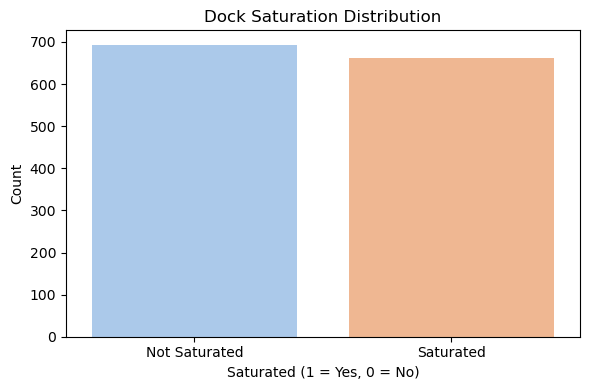

In [7]:
# Plotting the distribution of 'saturated'

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='saturated', palette='pastel')
plt.title('Dock Saturation Distribution')
plt.xlabel('Saturated (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Saturated', 'Saturated'])
plt.tight_layout()
plt.show()

This graph displays the distribution of dock saturation events in the dataset. It is clear that the highest of observations are classified as not saturated (label 0), suggesting that most of the time, riders are able to find an available dock. However, still great proportion of events are still saturated (label 1), which can result in negative user experiences. This saturation situation can cause system-wide inefficiencies and customer frustration. This imbalance in class frequency also informs our model selection strategy, prompting the use of precision and recall metrics over accuracy.

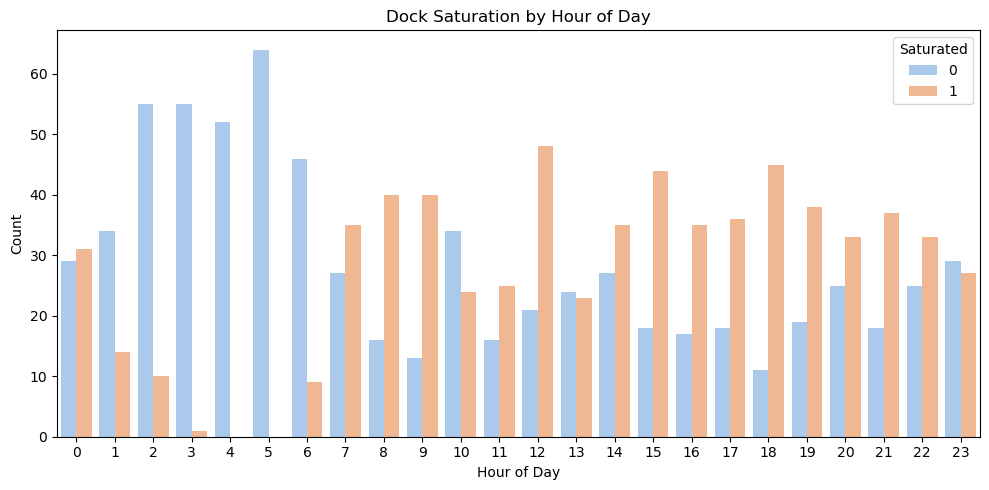

In [9]:
# Plotting & Analyzing saturation patterns by hour

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour', hue='saturated', palette='pastel')
plt.title('Dock Saturation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Saturated')
plt.tight_layout()
plt.show()

## Insight:
This chart shows a clear relationship between dock saturation and the time of day. Saturation peaks around **8 AM**, **12–3 PM**, and again at **5–6 PM**, which aligns with common commute periods. These peaks suggest that bikes are primarily used for **work-related travel** rather than recreational purposes. In contrast, usage drops significantly during the **early morning hours (12 AM to 5 AM)**. This indicates minimal demand for bike sharing during non-working hours.


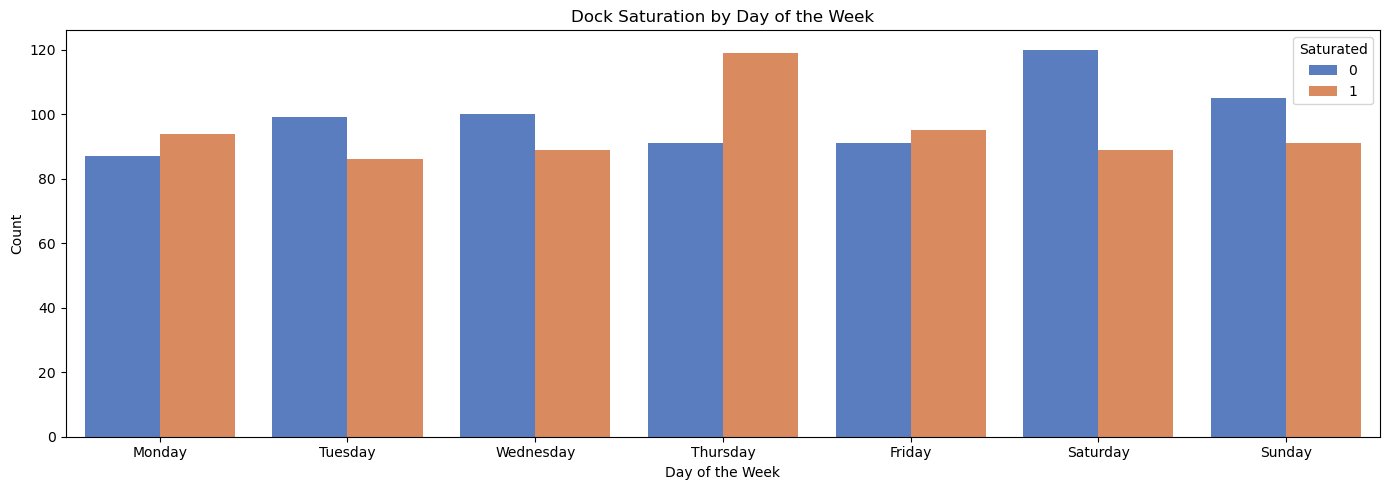

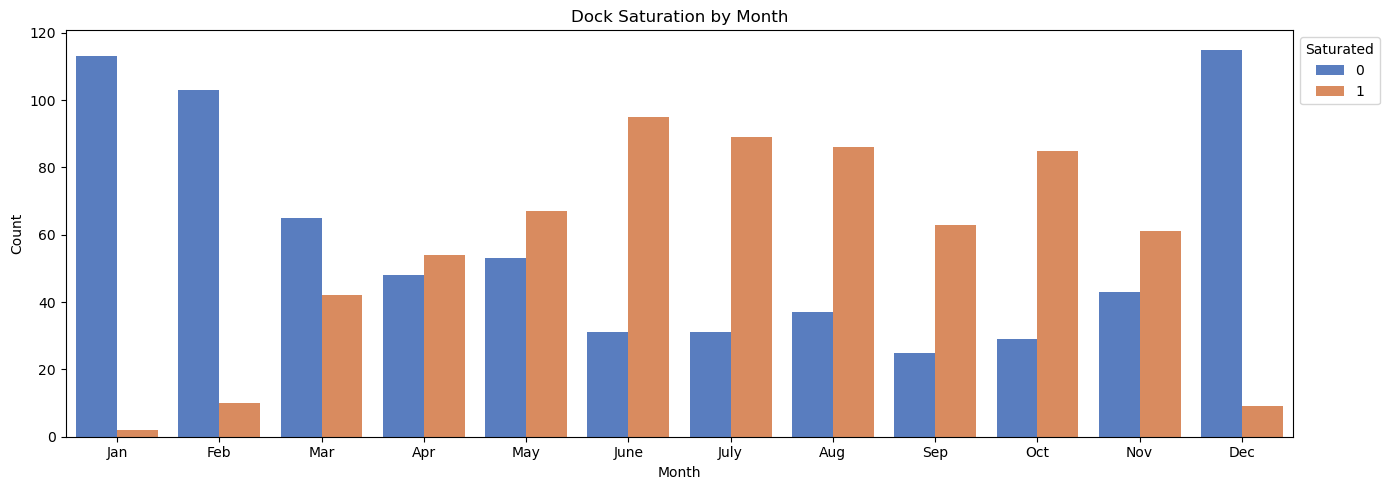

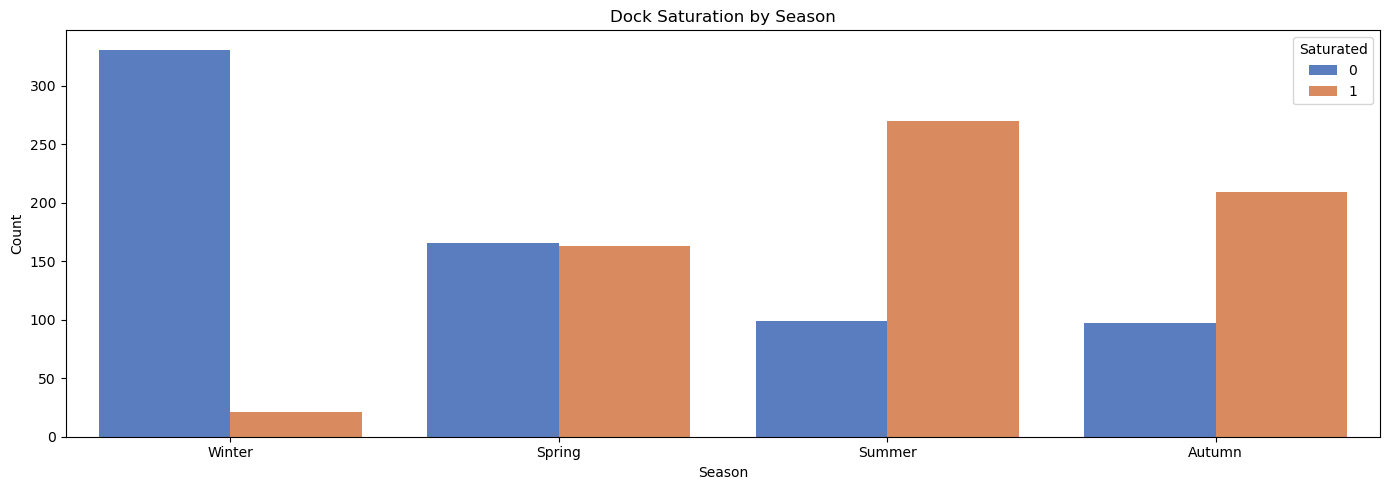

In [58]:
# Plotting & Analyzing saturation by day of the week
plt.figure(figsize=(14, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='day_of_week', hue='saturated', order=order, palette='muted')
plt.title('Dock Saturation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Saturated')
plt.tight_layout()
plt.show()

# Plotting & Analyzing saturation by month
plt.figure(figsize=(14, 5))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
               'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data=df, x='month', hue='saturated', order=month_order, palette='muted')
plt.title('Dock Saturation by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Saturated', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.tight_layout()
plt.show()

# Plotting & Analyzing saturation by season
plt.figure(figsize=(14, 5))
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
sns.countplot(data=df, x='seasons', hue='saturated', order=season_order, palette='muted')
plt.title('Dock Saturation by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Saturated')
plt.tight_layout()
plt.show()

### Dock Saturation by Day of the Week
This plot breaks down saturation frequency across the days of the week. saturation is relatively balanced across Monday to Friday, but there's a noticeable peak on Thursday, where saturation (label 1) surpasses non-saturation (label 0) indicating increased commuter volume or mid-week activity spikes. On saturday, non-saturated docks (label 0) dominate. This indicates either lower usage or better availability, likely because commuting demand drops and recreational users have more flexibility. Other days are maintain a near equal ratio of dock states. Redistribution and planning efforts could be optimized especially boosting dock space availability on Thursdays and managing weekend overstock.

### Dock Saturation by Month
Looking at the monthly dock saturation trends, a clear seasonal rhythm emerges in how people use the Bay Wheels service. During the warmer months especially from June through October docks are far more likely to become saturated. This is when people are out and about more, whether commuting to work, enjoying longer days, or just taking advantage of the good weather. June and July stand out in particular, with saturation levels peaking, likely driven by a mix of commuting, tourism, and recreational rides. On the other hand, in the colder winter months like December and January, saturation drops sharply—people are likely choosing other forms of transportation or simply staying indoors. The gradual rise in activity starting in March shows how ridership begins to pick up as temperatures climb. These patterns highlight a very human story: people turn to bikes when it feels good to be outside. For Bay Wheels, this means preparing for seasonal shifts with smart resource planning—especially in those busy summer months when riders rely on the system most.

### Dock Saturation by Season
This seasonal view tells us that during winter docks are rarely full—it's cold, days are shorter, and people naturally prefer indoor or alternative modes of transportation. As the seasons shift into spring, usage picks up, and saturation begins to balance out, likely because the weather becomes more inviting. But it's in the summer that things really take off- the number of saturated docks skyrockets, clearly showing that people love to ride when the sun’s out and the days are longer. Whether commuting, exploring, or running errands, summer bikes are in constant motion, and that leads to full docks more often. In autumn, while things cool down slightly, dock saturation still stays high likely driven by commuters settling into a consistent post-summer routine. This pattern reflects not just usage data, but real human behavior in response to seasons, reminding Bay Wheels of the importance of planning ahead for these naturally busy cycles.

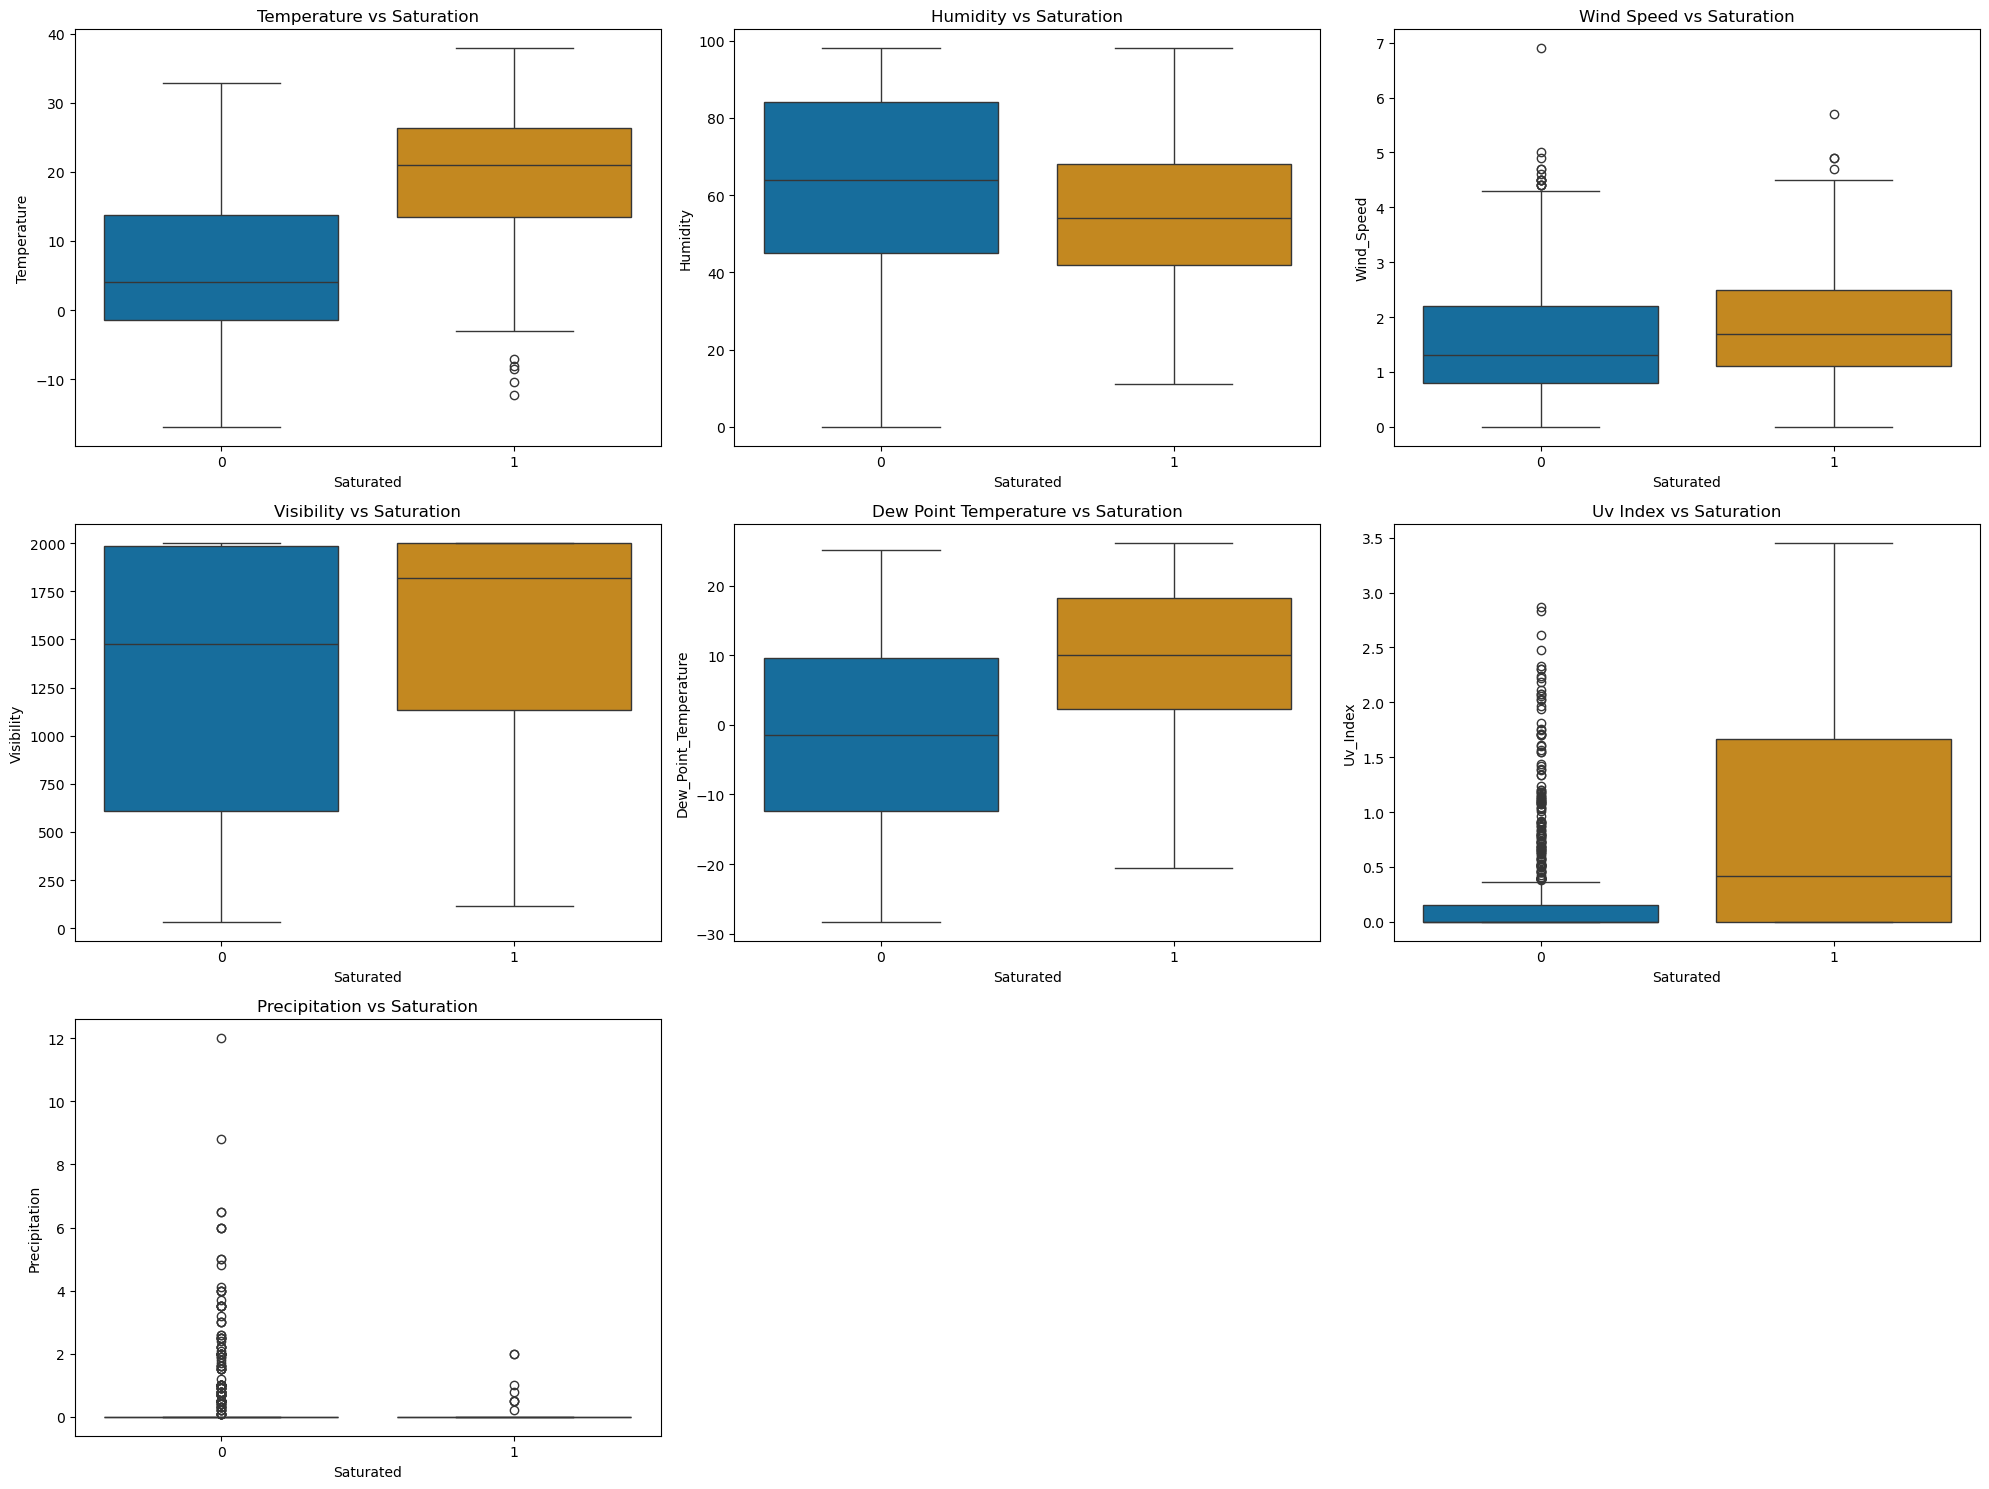

In [48]:
# Visualizing weather-related features against dock saturation
weather_features = ['temperature', 'humidity', 'wind_speed', 
                    'visibility', 'dew_point_temperature', 
                    'uv_index', 'precipitation']

# Creating boxplots to see distribution for each weather variable vs saturation
plt.figure(figsize=(20, 15))
for i, col in enumerate(weather_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='saturated', y=col, palette='colorblind')
    plt.title(f'{col.replace("_", " ").title()} vs Saturation')
    plt.xlabel('Saturated')
    plt.ylabel(col.title())

plt.tight_layout()
plt.show()

### Insight:
These boxplots offer a deep dive into how weather conditions relate to dock saturation. Temperature has a clear range (10°C–0°C) where saturation is most likely, indicating that colder temperatures suppress biking activity. Other variables such as- Humidity, wind speed, and precipitation show that the relationship with saturation indicating drier, calmer, and clear-weather conditions are linked with user experience and could be seen to have not much of impact on saturation rates. Visibility and UV index are also higher during saturation events, suggesting that riders prefer well-lit, sunny days. These findings are supported and visualised by the feature importance rankings in the predictive models below, further validating the role of environmental factors in user behavior.

## Temperature Analysis

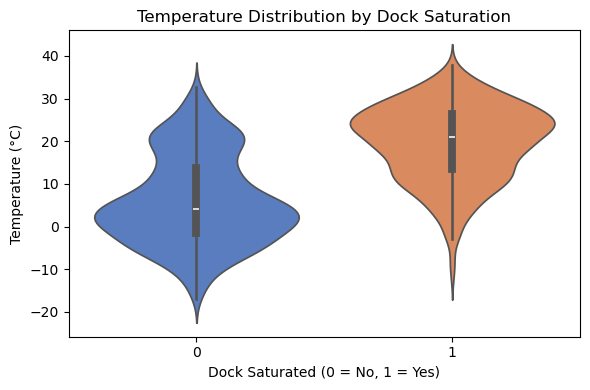

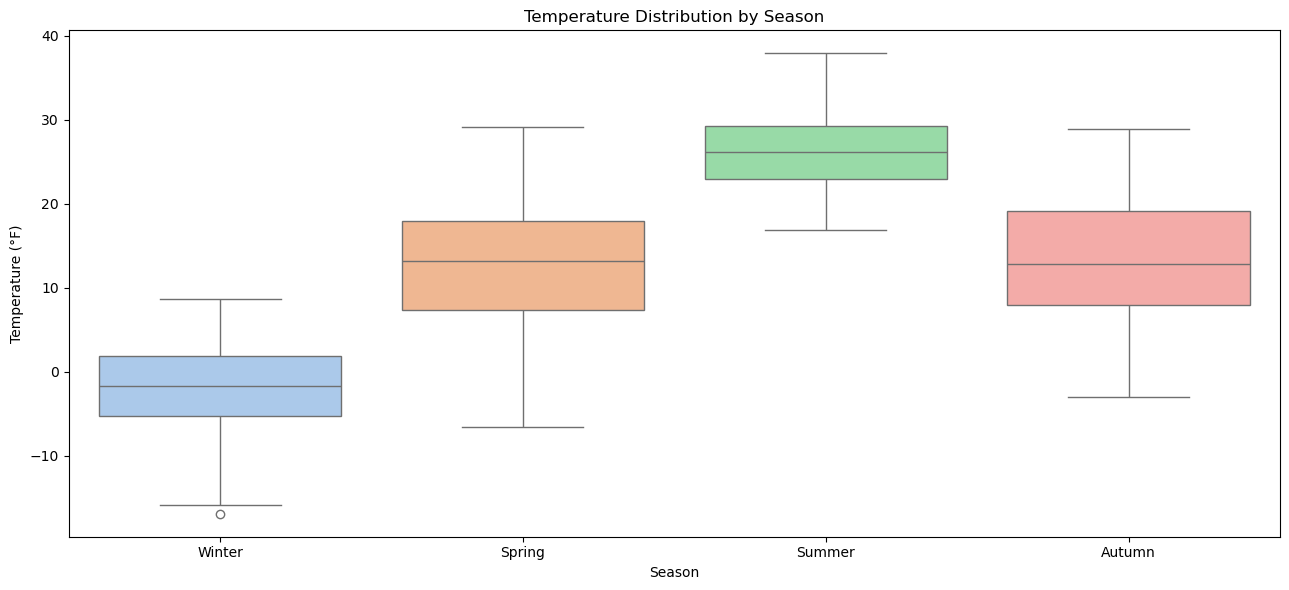

In [64]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='saturated', y='temperature', palette='muted')
plt.title('Temperature Distribution by Dock Saturation')
plt.xlabel('Dock Saturated (0 = No, 1 = Yes)')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(13, 6))
sns.boxplot(data=df, x='seasons', y='temperature', palette='pastel', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°F)')
plt.tight_layout()
plt.show()

## Interpretation:
## Temperature Distribution by Dock Saturation
This above plot provides a clear visual comparison of temperature ranges associated with dock saturation (1) versus non-saturation (0). We can see that saturated docks are more likely to occur at higher temperatures, with a distribution that peaks between 15°C and 30°C, indicating that bike usage—and therefore dock saturation—increases as the weather becomes warmer and more comfortable. On the other hand, non-saturated docks tend to occur more frequently at lower temperatures, especially below 10°C, where rider activity is likely reduced due to cold conditions.
The shape of the violins also tells us about variability. For example, saturated events have a wider distribution at mid to high temperatures, suggesting more consistent usage across a broader comfortable range. Non-saturated events, meanwhile, are more concentrated around colder values, reinforcing the notion that fewer people ride—and fewer docks get filled—when it's chilly out.
Overall, the plot confirms a key insight from the model: temperature is a major driver of dock saturation, and warmer days are far more likely to lead to full docks than colder ones.

## Temperature Distribution by Season
The boxplot shows a clear seasonal trend in temperature. Winter is the coldest, with many days below 0°C, which likely contributes to lower bike usage. Spring and autumn both have moderate temperatures, with medians around 13–15°C, creating more favorable conditions for riders. Summer stands out as the warmest season, with a tight range between 20°C and nearly 38°C, making it ideal for biking. The data reinforces that warmer seasons encourage more ridership, aligning with the saturation trends seen in previous visuals.

## Encode categorical variables

In [19]:
# Encode categorical variables
df_encoded = df.copy()

# Dropping 'id' column in df_encoded as variable is just a row indicator
df_encoded.drop(columns=['id'], inplace=True)

# Binary encoding for 'holiday' (Yes/No)
df_encoded['holiday'] = df_encoded['holiday'].map({'Yes': 1, 'No': 0})

# One-hot encoding for 'month', 'day_of_week', and 'seasons'
df_encoded = pd.get_dummies(df_encoded, columns=['month', 'day_of_week', 'seasons'], drop_first=True)

# Display shape
print(f"Data shape: {df_encoded.shape}")

# Display first 5 rows
display(df_encoded.head())

Data shape: (1356, 30)


,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,uv_index,precipitation,holiday,saturated,...,month_Sep,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,seasons_Spring,seasons_Summer,seasons_Winter
0,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,1,0,...,False,False,False,True,False,False,False,False,False,True
1,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,1,0,...,False,False,False,True,False,False,False,False,False,True
2,17,1.8,33,3.3,1913,-12.8,0.18,0.0,1,0,...,False,False,False,True,False,False,False,False,False,True
3,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,1,0,...,False,False,False,True,False,False,False,False,False,True
4,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,0,0,...,False,True,False,False,False,False,False,False,False,True


## Running Models and Data Split

In [21]:
# Split into features (X) and target (y)
X = df_encoded.drop(columns=['saturated'])
y = df_encoded['saturated']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model performance
model_results = {}

# Training Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_pred),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1 Score': f1_score(y_test, lr_pred)
}

# Training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
model_results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, dt_pred),
    'Precision': precision_score(y_test, dt_pred),
    'Recall': recall_score(y_test, dt_pred),
    'F1 Score': f1_score(y_test, dt_pred)
}

# Training Gradient Boosted Machine (GBM)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
model_results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, gbm_pred),
    'Precision': precision_score(y_test, gbm_pred),
    'Recall': recall_score(y_test, gbm_pred),
    'F1 Score': f1_score(y_test, gbm_pred)}

# Training Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 Score': f1_score(y_test, rf_pred)}

# Convert to DataFrame for display
results_df = pd.DataFrame(model_results).T
print(results_df.sort_values(by="F1 Score", ascending=False))

                     Accuracy  Precision    Recall  F1 Score
Gradient Boosting    0.926471   0.937984  0.909774  0.923664
Random Forest        0.926471   0.937984  0.909774  0.923664
Decision Tree        0.875000   0.841379  0.917293  0.877698
Logistic Regression  0.878676   0.867647  0.887218  0.877323


## Model Performance
Both Gradient Boosting and Random Forest performed the best, achieving identical metrics with an impressive F1 score of 0.92, indicating strong balance between precision and recall. Decision Tree and Logistic Regression followed closely but showed slightly lower consistency. While Logistic Regression offered decent precision, it lagged slightly in recall. Overall, ensemble models (Random Forest & GBM) are clearly the most reliable for predicting dock saturation in this dataset.

## Confusion Matrix

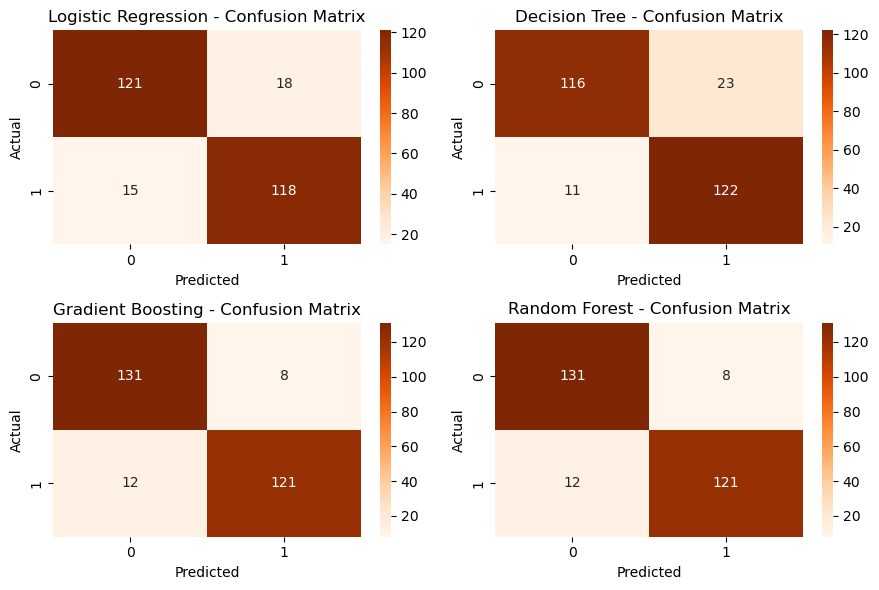

In [24]:
# Store model predictions for confusion matrices
model_preds = {
    'Logistic Regression': lr_pred,
    'Decision Tree': dt_pred,
    'Gradient Boosting': gbm_pred,
    'Random Forest': rf_pred
}

# Plot all confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
for ax, (model_name, preds) in zip(axes.flat, model_preds.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_title(f'{model_name} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Insight

The confusion matrices above provide a comparative view of how each model performs in predicting dock saturation (1) vs. non-saturation (0). Both Random Forest and Gradient Boosting achieve a strong balance between true positives and true negatives, showing very few false positives (predicting saturation when there isn’t any) and false negatives (failing to predict when saturation occurs). This reinforces why these models scored the highest F1 scores in our earlier evaluation.
Logistic Regression, while relatively accurate, struggles more with false negatives, which could lead to real-world user frustrations—e.g., arriving at a full dock when the model predicted availability. Decision Tree has a tendency to overfit slightly, showing higher false positives and false negatives than the ensemble methods.
This analysis validates our earlier business recommendation: we should prioritize reducing false negatives to preserve the user experience. Ensemble models like Random Forest and Gradient Boosting are better suited for this task. ​

## Feature Importance

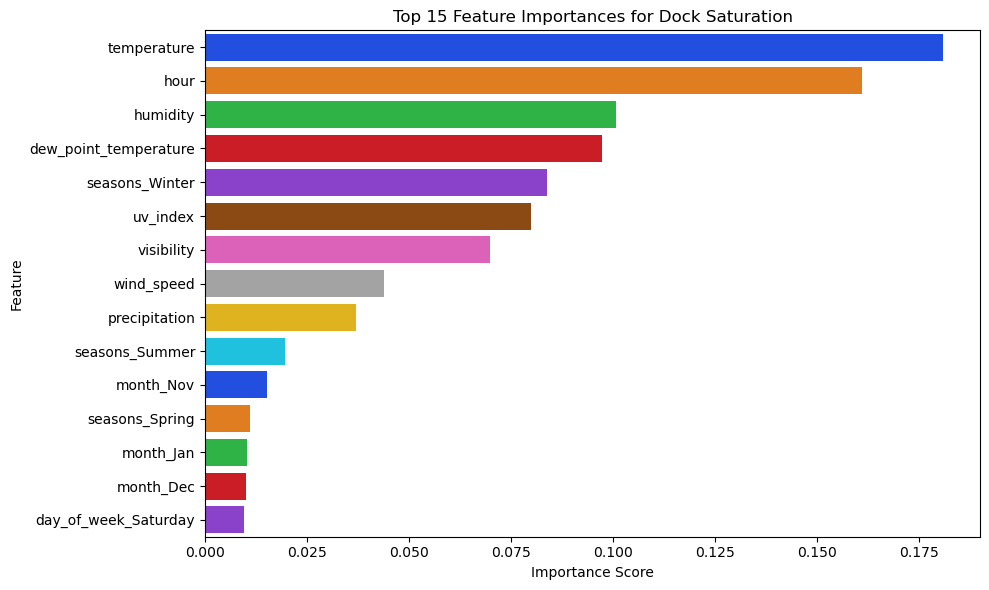

temperature              0.180829
hour                     0.161026
humidity                 0.100652
dew_point_temperature    0.097221
seasons_Winter           0.083811
uv_index                 0.079912
visibility               0.069867
wind_speed               0.043873
precipitation            0.036890
seasons_Summer           0.019520
dtype: float64

In [68]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize top feature importances
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
sns.barplot(x=top_features.values, y=top_features.index, palette='bright')
plt.title('Top 15 Feature Importances for Dock Saturation')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

feature_importance.head(10)

## Interpretation:

The Random Forest model highlights **temperature**, **hour**, and **humidity** as the top three predictors of dock saturation. This ranking closely mirrors what we observed during exploratory data analysis, reinforcing that the model has effectively captured meaningful patterns in rider behavior. Notably, the importance of both **seasonal indicators** (like `seasons_Winter`) and **real-time weather features** such as **UV index**, **wind speed**, and **visibility** suggests that both **environmental conditions and temporal context** play a significant role in predicting saturation. This finding supports a more dynamic approach to operational planning—one that considers not just static schedules, but real-time environmental data. The strong alignment between feature importance and earlier insights builds confidence in the model and confirms that these variables are essential to focus on when addressing dock availability challenges.


## Correlation

In [30]:
# Add target column temporarily to compute correlation
corr_df = df_encoded.copy()
corr_matrix = corr_df.corr(numeric_only=True)

# Correlation of features with 'saturated'
target_corr = corr_matrix['saturated'].drop('saturated').sort_values(ascending=False)
target_corr.head(15)

temperature              0.572226
dew_point_temperature    0.405445
uv_index                 0.386552
hour                     0.306181
seasons_Summer           0.296951
visibility               0.207262
month_June               0.169693
month_July               0.157533
month_Oct                0.155565
month_Aug                0.132844
month_Sep                0.119616
wind_speed               0.116582
day_of_week_Thursday     0.066563
month_Nov                0.056273
month_May                0.043256
Name: saturated, dtype: float64

## Insights:
The strongest linear drivers of dock saturation are warmer temperatures, sunny conditions, and summer months, while cold, wet weather and winter months reduce saturation likelihood. These insights align closely with the feature importance results from your models, validating the conclusions through both statistical and model-driven perspectives.

# Analysis Questions 

## Q1: Based on your analysis, is bike sharing being used primarily for exercise, recreation, commuting to work, or some other purpose?

The analysis strongly suggests that bike sharing with Bay Wheels is being used primarily for commuting to work. We see clear spikes in dock saturation during weekday mornings, noon and evenings, especially around 8 AM, 12 PM and 5–6 PM, which closely align with standard commute times. On weekends, saturation drops noticeably, indicating that casual or recreational usage is far less common. The consistent weekday patterns show that bikes are integrated into people’s daily routines—helping them get to work, school, or transit hubs. Rather than being just a fitness or leisure option, Bay Wheels is clearly functioning as a reliable mode of everyday urban transportation.

## Q2: Does dock saturation happen more often when temperature is ideal? If so, what is considered an "ideal" temperature, according to the data? Does this align with what is considered an ideal temperature for riding a bike, according to your research?

Yes, dock saturation in the Bay Wheels dataset occurs more frequently when the temperature is within a locally “ideal” range. While the data dictionary initially mentioned Fahrenheit, the actual values are in Celsius, with saturation most common between 15°C and 30°C. This range reflects mild to warm conditions, which aligns with global cycling norms that suggest 15–24°C as ideal for riding. In colder or hotter extremes, saturation drops off, indicating reduced rider activity. The consistency between rider behavior and temperature patterns supports the conclusion that weather comfort plays a major role in dock usage.

## Q3: According to the data, are there times of day, months, or seasons that are expected to have higher dock saturation? Why or why not?

Absolutely. Dock saturation is highly dependent on both time and season. As seen in the visual breakdowns, saturation is highest during commuting hours, particularly in the early morning and late afternoon. Monthly analysis shows that June to October sees the greatest saturation, likely because of warmer weather and consistent daily routines post-summer vacations. Seasonally, summer leads the pack, followed closely by autumn, suggesting that both recreational and work-related usage spikes during this period. In contrast, winter shows extremely low saturation, which is expected due to colder, less inviting conditions. These trends highlight predictable cycles in ridership, driven largely by temperature, daylight, and lifestyle patterns.

## Q4: What is the most important factor (x-feature) in predicting dock saturation? Interpret the relationship between this factor and dock saturation (follows a linear trend, is it best expressed in ranges, etc.).

The most important factor in predicting dock saturation is temperature, followed closely by hour of the day and humidity. The model indicates that dock saturation tends to increase within the range of approximately 15°C to 30°C, which aligns with comfortable biking conditions. Rather than following a strict linear trend, the relationship is best expressed in ranges, where saturation rises during ideal weather and tapers off outside of it. Similarly, hour of the day shows clear spikes during commuting times rather than gradual changes, suggesting a categorical or peak-period effect. These patterns reveal that both environmental and behavioral factors drive saturation, and the model captures these non-linear dynamics effectively.

## Q5: In your analytical opinion, which is the more critical error to control: false positives or false negatives? Provide a "human" context to the risk of each error and justify your rationale for minimizing one of them in terms of the business.

In this case, false negatives (predicting no saturation when saturation actually occurs) are more critical to control. A false negative leads to a user reaching a full dock with no space to park, causing frustration, wasted time, and a potential loss of trust in the service. From a business perspective, this can directly affect user retention and satisfaction. On the other hand, a false positive (predicting saturation when there isn't any) may lead to unnecessary rebalancing by the operations team, but it doesn’t negatively impact the user experience. Therefore, it's better to be on the side of caution and prioritize minimizing false negatives to maintain a smooth, reliable experience for riders.